# Classification Examples

In [1]:
# # Change path to project root
%cd ..

/home/amirhessam/Documents/GitHub/slick-ml


In [2]:
%load_ext autoreload

# widen the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# change the path and loading class
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
%autoreload
from slickml.classification import XGBoostClassifier, XGBoostCVClassifier

# XGBoostClassifier

## Example 1

In [4]:
# loading data
df = pd.read_csv("data/dummy_data.csv")
df.head()

,F1,F2,F3,F4,F5,F6,CLASS
0,5.7,4.7,3.7,58.0,249.30,456.47,0
1,7.7,6.6,4.1,20.0,260.92,443.43,1
2,6.2,4.3,4.6,59.0,255.63,478.96,1
3,5.7,4.4,3.8,49.0,195.28,381.94,0
4,9.1,4.7,4.6,17.0,259.55,395.67,1


In [5]:
# define X, y
y = df.CLASS.values
X = df.drop(["CLASS"], axis=1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=1367)

In [7]:
# setup feature selector object
params={"eval_metric" : "auc",
        "learning_rate" : 0.05,
        "max_depth": 2,
        "min_child_weight" : 1,
        "gamma" : 0.0}

clf = XGBoostClassifier(num_boost_round=333,
                        metrics=("logloss"),
                        params=params)
clf.fit(X_train, y_train)

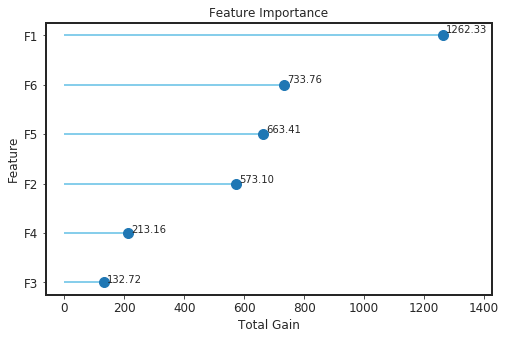

In [8]:
clf.plot_feature_importance()

In [9]:
# predic proba (or clf.predict_proba_)
pred_proba = clf.predict_proba(X_test, y_test)
pred_proba[:10]

array([0.73965067, 0.5696501 , 0.99523526, 0.9484255 , 0.8447806 ,
       0.82250917, 0.6434073 , 0.94061166, 0.98938864, 0.9988084 ],
      dtype=float32)

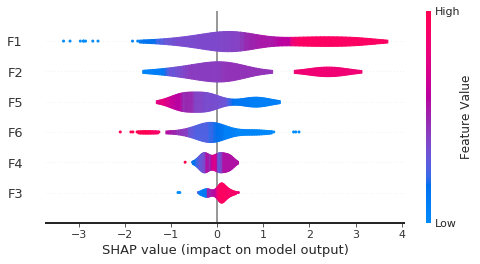

In [10]:
clf.plot_shap_summary(plot_type="violin")

In [11]:
clf.shap_values_test_[:10]

array([[-1.29101670e+00, -7.59483695e-01,  4.23069239e-01,
         7.15033263e-02,  8.11926782e-01,  1.83317453e-01],
       [ 2.80811101e-01, -7.84179568e-01, -3.91910583e-01,
        -7.42497072e-02, -2.15765968e-01, -1.39118791e-01],
       [ 2.23853612e+00,  2.24254704e+00,  5.89059219e-02,
        -1.92948282e-02, -6.92405522e-01, -9.13755521e-02],
       [ 1.97109222e+00,  2.62834191e-01,  8.69086683e-02,
         2.59986520e-01, -7.12282360e-01, -5.61602592e-01],
       [ 2.24647950e-02, -1.39900184e+00, -4.01935488e-01,
        -9.58486274e-02,  7.84132004e-01,  1.17958856e+00],
       [ 4.06535149e-01, -5.99463470e-04, -2.79712349e-01,
         5.79649955e-02, -1.13711789e-01, -1.41872466e-01],
       [ 3.46254379e-01, -1.08612394e+00,  1.58513725e-01,
         6.82047531e-02, -2.86880642e-01, -2.14622274e-01],
       [ 4.13488388e-01,  1.02422154e+00,  5.96283525e-02,
         5.66690862e-02, -2.76417404e-01, -1.19996436e-01],
       [ 3.53629142e-01,  2.50538158e+00,  5.481

In [12]:
clf.shap_values_train_[:10]

array([[ 1.8890705 ,  2.5171251 , -0.15341438, -0.32906467, -0.78498584,
        -0.3744133 ],
       [ 0.3248044 , -0.2342411 ,  0.04329606,  0.23779924, -0.27085415,
        -0.28651807],
       [ 0.27552384, -1.3393304 , -0.4149736 ,  0.03477486,  0.1096679 ,
         0.14510901],
       [ 2.8261237 ,  2.386949  ,  0.05342117, -0.19627506, -0.03355521,
         0.02238344],
       [ 2.8193345 ,  0.34072563,  0.07263777,  0.17394564, -0.25422522,
        -1.3115385 ],
       [ 1.8913594 ,  2.5171251 , -0.1045079 , -0.24317099, -0.7901514 ,
        -0.42828214],
       [ 1.9564734 ,  0.9576397 ,  0.05829946, -0.24200746, -0.46703762,
        -0.19142887],
       [ 0.29071796,  0.11359535,  0.23424551, -0.12817226, -0.22862864,
         1.0447849 ],
       [ 0.10406707, -0.04654092,  0.06785324,  0.04517091,  0.9123624 ,
         0.08266833],
       [ 0.18870184, -1.4113625 ,  0.15851372,  0.12719016, -0.2572527 ,
        -0.25356317]], dtype=float32)

In [13]:
# feature importance (or clf.feature_importance_)
clf.get_feature_importance()

,feature,total_gain
0,F1,1262.331832
1,F6,733.761238
2,F5,663.409492
3,F2,573.096915
4,F4,213.159127
5,F3,132.719380


# XGBoostCVClassifier

## Example 1

In [14]:
# loading data
df = pd.read_csv("data/dummy_data.csv")
df.head()

,F1,F2,F3,F4,F5,F6,CLASS
0,5.7,4.7,3.7,58.0,249.30,456.47,0
1,7.7,6.6,4.1,20.0,260.92,443.43,1
2,6.2,4.3,4.6,59.0,255.63,478.96,1
3,5.7,4.4,3.8,49.0,195.28,381.94,0
4,9.1,4.7,4.6,17.0,259.55,395.67,1


In [15]:
# define X, y
y = df.CLASS.values
X = df.drop(["CLASS"], axis=1)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=1367)

In [17]:
# setup feature selector object
params={"eval_metric" : "auc",
        "learning_rate" : 0.05,
        "max_depth": 2,
        "min_child_weight" : 1,
        "gamma" : 0.0}

clf = XGBoostCVClassifier(num_boost_round=500,
                          n_splits=4,
                          metrics=("logloss"),
                          params=params)
clf.fit(X_train, y_train)

*-* Best Boosting Round = 191 -*- 4-Folds CV LOGLOSS: Train = 0.232 +/- 0.008 -*- Test = 0.320 +/- 0.025 *-*


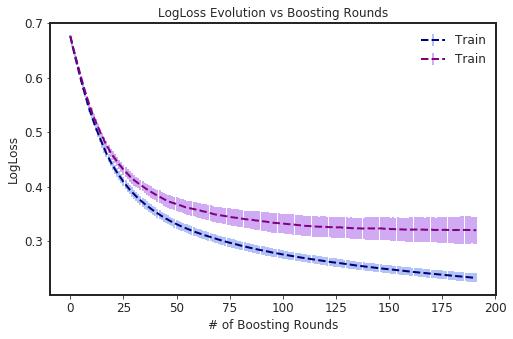

In [18]:
clf.plot_cv_results()

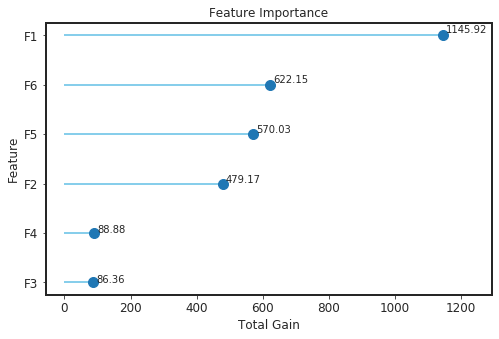

In [19]:
clf.plot_feature_importance()

In [20]:
# predic proba (or clf.predict_proba_)
pred_proba = clf.predict_proba(X_test, y_test)
pred_proba[:10]

array([0.6872404 , 0.6437372 , 0.9898107 , 0.91745585, 0.8029401 ,
       0.79498386, 0.6696425 , 0.9213432 , 0.9763105 , 0.9957327 ],
      dtype=float32)

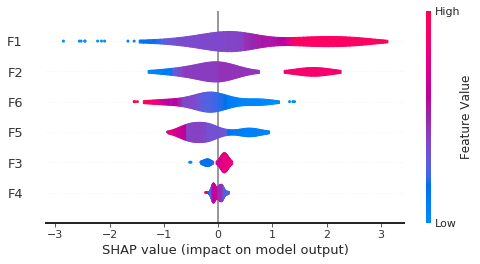

In [21]:
clf.plot_shap_summary(plot_type="violin")

In [22]:
clf.shap_values_test_[:10]

array([[-1.17578661e+00, -5.86567044e-01,  2.24011347e-01,
         1.57289244e-02,  5.16849458e-01,  1.82012349e-01],
       [ 2.63391405e-01, -6.70697689e-01, -3.13290775e-01,
        -2.99329627e-02, -1.77391380e-01, -9.14573073e-02],
       [ 1.92844176e+00,  1.65123546e+00,  6.71078265e-02,
        -1.91674568e-04, -4.64400291e-01, -2.17012703e-01],
       [ 1.73300028e+00,  5.55277169e-02,  7.87695572e-02,
         7.93843195e-02, -5.03318131e-01, -6.46094084e-01],
       [-8.95560607e-02, -1.23228216e+00, -3.07602823e-01,
        -7.56613836e-02,  5.68822742e-01,  9.30051088e-01],
       [ 2.82156050e-01, -1.97538398e-02, -2.15325534e-01,
         6.93768915e-03, -1.98684931e-01, -1.11096114e-01],
       [ 2.41128638e-01, -9.37509894e-01,  1.55264497e-01,
        -3.11029796e-03, -2.40322769e-01, -1.19882606e-01],
       [ 3.48925084e-01,  6.94350719e-01,  7.06390738e-02,
         5.83638158e-03, -1.72579139e-01, -9.74345058e-02],
       [ 2.96836704e-01,  1.69714773e+00,  1.374

In [23]:
clf.shap_values_train_[:10]

array([[ 1.6810727 ,  1.8670248 , -0.12494415, -0.11206084, -0.5291322 ,
        -0.4470591 ],
       [ 0.20235999, -0.23255867,  0.05476505,  0.06951104, -0.21339028,
        -0.4764193 ],
       [ 0.15221135, -1.1012809 , -0.32120004,  0.01052977,  0.04009805,
         0.23228301],
       [ 2.3585417 ,  1.646324  ,  0.06655529, -0.08806157, -0.11101343,
         0.0118833 ],
       [ 2.3252146 ,  0.07344273,  0.06707823,  0.1696119 , -0.47139165,
        -1.3900161 ],
       [ 1.6970465 ,  1.8670248 , -0.12494415, -0.07160836, -0.5291322 ,
        -0.4470591 ],
       [ 1.6877612 ,  0.63464016,  0.06441025, -0.0825933 , -0.2945922 ,
        -0.23303552],
       [ 0.25127745,  0.03300017,  0.15304364, -0.10549548, -0.1993008 ,
         0.8770816 ],
       [ 0.12158564, -0.06782506,  0.08321874,  0.01529711,  0.55117816,
         0.2280842 ],
       [ 0.18574946, -1.0985618 ,  0.1552645 ,  0.02025529, -0.2360702 ,
        -0.43954518]], dtype=float32)

In [24]:
# cv_results (or clf.cv_results_)
cvr = clf.get_cv_results()
cvr.tail()

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
187,0.233434,0.008174,0.320090,0.025060
188,0.233021,0.008195,0.320024,0.024866
189,0.232621,0.008224,0.320062,0.024701
190,0.232216,0.008193,0.319890,0.024903
191,0.231895,0.008241,0.319651,0.024945


In [25]:
# feature importance (or clf.feature_importance_)
clf.get_feature_importance()

,feature,total_gain
0,F1,1145.921151
1,F6,622.148287
2,F5,570.030153
3,F2,479.170822
4,F4,88.880518
5,F3,86.359118
